In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set(style="ticks")

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('D:/Projects/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
claims.rename(columns = {'customer_id' : 'CUST_ID'}, inplace = True)
claims

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust = pd.read_csv('D:/Projects/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
cust_claims = pd.merge(left = cust, right = claims, on = 'CUST_ID', how = 'outer')
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [5]:
cust_claims.DateOfBirth = pd.to_datetime(cust_claims.DateOfBirth, format = '%d-%b-%y')
cust_claims.DateOfBirth = np.where(pd.DatetimeIndex(cust_claims['DateOfBirth']).year > 2000, cust_claims.DateOfBirth + pd.DateOffset(years = -100), cust_claims.DateOfBirth)
cust_claims.claim_date = pd.to_datetime(cust_claims.claim_date, format = '%m/%d/%Y')
cust_claims.Contact = cust_claims.Contact.str.replace('-', '').astype(float)
cust_claims.total_policy_claims = cust_claims.total_policy_claims.astype(object)

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [6]:
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$', '', regex = False).astype(float)

In [7]:
cust_claims.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims            object
fraudulent                     object
dtype: object

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [8]:
cust_claims['alert_flag'] = np.where(cust_claims.police_report == 'No', 0, (np.where(cust_claims.police_report == 'Yes', 1, np.nan))).astype(object)
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0.0
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0.0
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [9]:
cust_claims.sort_values(by = 'claim_date', ascending = False, inplace = True)
cust_claims.drop_duplicates(subset = 'CUST_ID', keep = 'first', inplace = True, ignore_index = True)
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0.0
1,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0.0
2,86491727,Female,1997-01-29,IL,2.941873e+09,Gold,32178193.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,NaN
3,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,NaN
4,65208809,Male,1964-04-22,VA,2.861286e+09,Platinum,91386759.0,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,74888099,Male,1980-07-22,CO,1.256138e+09,Platinum,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,36009093,Female,1984-06-04,SC,2.643746e+09,Platinum,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,60016590,Female,1984-05-25,NV,6.497428e+09,Silver,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,96861647,Female,1996-08-06,NH,4.957323e+09,Silver,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [10]:
cust_claims.isna().sum()

CUST_ID                  0
gender                  15
DateOfBirth             15
State                   15
Contact                 15
Segment                 15
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
police_report            7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
alert_flag             305
dtype: int64

In [11]:
cust_claims.loc[:, cust_claims.dtypes == 'object'] = cust_claims.loc[:, cust_claims.dtypes == 'object'].apply(lambda x : x.fillna(x.mode()[0]))
cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean(), inplace = True)
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0.0
1,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0.0
2,86491727,Female,1997-01-29,IL,2.941873e+09,Gold,32178193.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.000000,1.0,No,0.0
3,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0.0
4,65208809,Male,1964-04-22,VA,2.861286e+09,Platinum,91386759.0,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,74888099,Male,1980-07-22,CO,1.256138e+09,Platinum,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0
1096,36009093,Female,1984-06-04,SC,2.643746e+09,Platinum,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0
1097,60016590,Female,1984-05-25,NV,6.497428e+09,Silver,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0
1098,96861647,Female,1996-08-06,NH,4.957323e+09,Silver,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0


In [12]:
cust_claims.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
alert_flag              0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
## Children < 18
## Youth 18-30
## Adult 30-60
## Senior > 60

In [13]:
cust_claims['age'] = pd.DatetimeIndex(cust_claims.claim_date).year - pd.DatetimeIndex(cust_claims.DateOfBirth).year
cust_claims['age_group'] = np.where(cust_claims.age < 18, 'Children', np.where(cust_claims.age < 30, 'Youth', np.where(cust_claims.age < 60, 'Adult', np.where(cust_claims.age < 100, 'Senior', np.nan))))
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,age,age_group
0,58451506,Male,1968-04-22,FL,6.735748e+09,Gold,43042986.0,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0.0,50.0,Adult
1,93915431,Male,1967-09-08,ME,1.347852e+09,Gold,99775483.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0.0,51.0,Adult
2,86491727,Female,1997-01-29,IL,2.941873e+09,Gold,32178193.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.000000,1.0,No,0.0,21.0,Youth
3,38011078,Female,1976-05-20,NE,2.711231e+09,Gold,98795403.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0.0,42.0,Adult
4,65208809,Male,1964-04-22,VA,2.861286e+09,Platinum,91386759.0,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,0.0,54.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,74888099,Male,1980-07-22,CO,1.256138e+09,Platinum,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0,NaN,nan
1096,36009093,Female,1984-06-04,SC,2.643746e+09,Platinum,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0,NaN,nan
1097,60016590,Female,1984-05-25,NV,6.497428e+09,Silver,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0,NaN,nan
1098,96861647,Female,1996-08-06,NH,4.957323e+09,Silver,NaN,Other causes,NaT,Auto,No,Material only,12475.499514,1.0,No,0.0,NaN,nan


## 8. What is the average amount claimed by the customers from various segments?

In [14]:
cust_claims.pivot_table(index = 'Segment', values = 'claim_amount', aggfunc = 'mean') 

,claim_amount
Segment,
Gold,12760.923744
Platinum,12371.429921
Silver,12267.540071


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [15]:
round(cust_claims.loc[cust_claims.claim_date < pd.to_datetime('2018-10-01') + pd.DateOffset(days = -20), :].groupby('incident_cause')[['claim_amount']].sum(), 1)

,claim_amount
incident_cause,
Crime,726959.5
Driver error,3344546.0
Natural causes,1315301.0
Other causes,3778023.5
Other driver error,3342803.0


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [16]:
cust_claims.loc[(cust_claims.age_group == 'Adult') & (cust_claims.State.isin(['TX', 'DE', 'AK'])) & (cust_claims.incident_cause.isin(['Driver error', 'Other driver error'])), :].groupby('State')[['age_group']].count()

,age_group
State,
AK,8
DE,9
TX,7


## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [17]:
gender_Segment = cust_claims.pivot_table(index = 'gender', columns = 'Segment', values = 'claim_amount', aggfunc = 'sum')
gender_Segment

Segment,Gold,Platinum,Silver
gender,,,
Female,2.122284e+06,2.382014e+06,1.934630e+06
Male,2.816193e+06,2.121186e+06,2.346741e+06


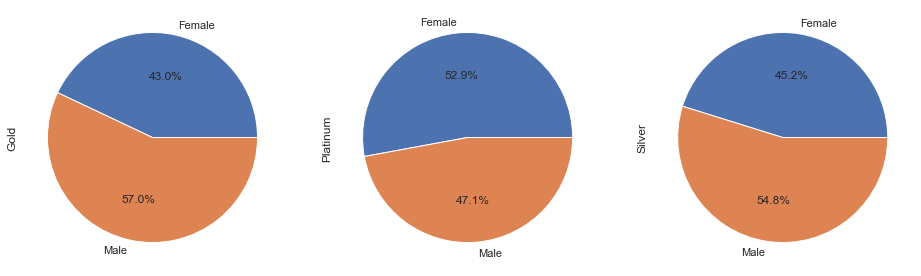

In [18]:
gender_Segment.plot(kind = 'pie', subplots = True, figsize = (16, 8), legend = False, autopct = '%1.1f%%')
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [19]:
gender_incident_cause = cust_claims.loc[cust_claims.incident_cause.isin(['Driver error', 'Other driver error']), ['gender', 'incident_cause']].groupby('gender').count()
gender_incident_cause

,incident_cause
gender,
Female,221
Male,286


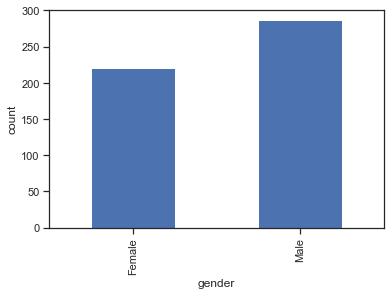

In [20]:
gender_incident_cause.plot(kind = 'bar', ylabel = 'count', legend = False)
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [21]:
age_group_fraudulent = cust_claims.loc[cust_claims.fraudulent == 'Yes', ['age_group', 'fraudulent']].groupby('age_group').count()
age_group_fraudulent

,fraudulent
age_group,
Adult,171
Youth,74
nan,7


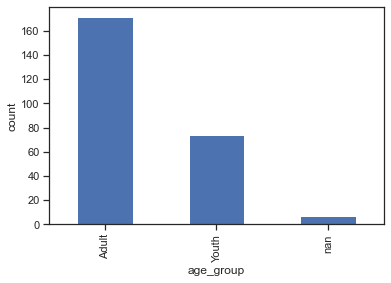

In [22]:
age_group_fraudulent.plot(kind = 'bar', ylabel = 'count', legend = False)
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [23]:
monthly_trend = cust_claims.loc[:, ['claim_date', 'claim_amount']].dropna(axis = 0, subset = ['claim_date']).sort_values(by = 'claim_date', ignore_index = True)
monthly_trend['Monthly'] = monthly_trend.claim_date.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
monthly_trend['Yearly'] = monthly_trend.claim_date.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
monthly_trend.groupby(['Yearly', 'Monthly'], sort = False)[['claim_amount']].sum()

claim_amount
Yearly Monthly                 
2017   January    607937.498541
       February   631403.999027
       March      617233.999027
       April      747949.499514
       May        547692.998541
       June       599861.499514
       July       790763.998054
       August     433852.499027
       September  459285.496595
       October    612256.998541
       November   625984.999027
       December   723236.499514
2018   January    719049.498054
       February   556608.499027
       March      731234.998541
       April      544511.999514
       May        567588.497568
       June       720560.997568
       July       592005.997568
       August     479654.499514
       September  523652.498541
       October    803393.497568

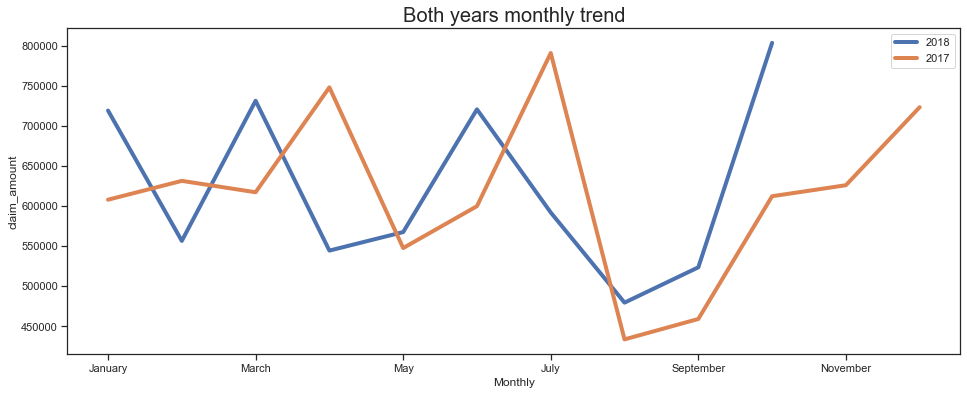

In [24]:
monthly_trend.loc[monthly_trend.Yearly == '2018', :].groupby('Monthly', sort = False)['claim_amount'].sum().plot(kind = 'line', ylabel = 'claim_amount', linewidth = 4, figsize = (16, 6), label = '2018', legend = True)
monthly_trend.loc[monthly_trend.Yearly == '2017', :].groupby('Monthly', sort = False)['claim_amount'].sum().plot(kind = 'line', ylabel = 'claim_amount', linewidth = 4, figsize = (16, 6), label = '2017', legend = True)
plt.title('Both years monthly trend', fontsize = 20)
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [25]:
Female_avg_claim_amount = cust_claims.loc[cust_claims.gender == 'Female', ['age_group', 'fraudulent', 'claim_amount']].groupby(['age_group', 'fraudulent']).mean().reset_index()
Female_avg_claim_amount.rename(columns = {'age_group' : 'Female_age_group'}, inplace = True)
Female_avg_claim_amount

,Female_age_group,fraudulent,claim_amount
0,Adult,No,12346.893214
1,Adult,Yes,12564.584237
2,Youth,No,12522.623947
3,Youth,Yes,7599.680502
4,nan,No,12475.499514


In [26]:
Male_avg_claim_amount = cust_claims.loc[cust_claims.gender == 'Male', ['age_group', 'fraudulent', 'claim_amount']].groupby(['age_group', 'fraudulent']).mean().reset_index()
Male_avg_claim_amount.rename(columns = {'age_group' : 'Male_age_group'}, inplace = True)
Male_avg_claim_amount

,Male_age_group,fraudulent,claim_amount
0,Adult,No,12304.506547
1,Adult,Yes,16803.365830
2,Youth,No,12395.035399
3,Youth,Yes,10683.947330
4,nan,No,11188.099903
5,nan,Yes,10519.214286


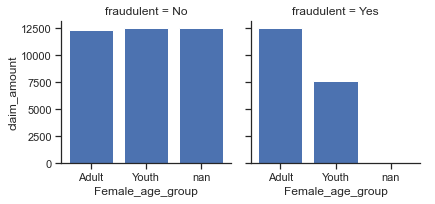

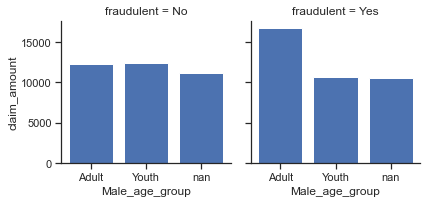

In [27]:
sns.FacetGrid(Female_avg_claim_amount, col = 'fraudulent').map(plt.bar, 'Female_age_group', 'claim_amount').add_legend()
plt.show()

sns.FacetGrid(Male_avg_claim_amount, col = 'fraudulent').map(plt.bar, 'Male_age_group', 'claim_amount').add_legend()
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [66]:
cust_claims.gender.value_counts()

Male      568
Female    532
Name: gender, dtype: int64

In [28]:
cust_claims.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [55]:
claim_amt = 'claim_amount'
male = cust_claims.loc[cust_claims.gender == 'Male', claim_amt]
female = cust_claims.loc[cust_claims.gender == 'Female', claim_amt]

print('mean of male claimed amount:', male.mean())
print('mean of female claimed amount:', female.mean())

mean of male claimed amount: 12824.156657601248
mean of female claimed amount: 12103.249029065853


In [60]:
# H0: u1 = u2
# Ha: u1 <> u2
# CI: 95%, p: 0.05

In [61]:
stats.ttest_ind(male, female)

Ttest_indResult(statistic=0.8976592115735609, pvalue=0.3695640453292348)

In [62]:
stats.f_oneway(male, female)

F_onewayResult(statistic=0.8057920601228616, pvalue=0.36956404532931886)

In [118]:
print('Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no similarity in the amount claimed by males and females.')

Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no similarity in the amount claimed by males and females.


## 17. Is there any relationship between age category and segment?

In [64]:
cust_claims.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [73]:
obs_freq = pd.crosstab(cust_claims.age_group, cust_claims.Segment)
obs_freq

Segment,Gold,Platinum,Silver
age_group,,,
Adult,267,244,245
Youth,104,117,101
nan,16,3,3


In [74]:
# H0: No relationship
# Ha: Association
# CI: 95%, p: 0.05

In [75]:
stats.chi2_contingency(obs_freq)

(15.665444169595649,
 0.0035025680855408727,
 4,
 array([[265.97454545, 250.16727273, 239.85818182],
        [113.28545455, 106.55272727, 102.16181818],
        [  7.74      ,   7.28      ,   6.98      ]]))

In [119]:
print('Business conclusion: As per the test, pvalue is < 0.05. Hence, we reject the Null Hypothesis H0 and We have customers of different segments coming from different age group.')

Business conclusion: As per the test, pvalue is < 0.05. Hence, we reject the Null Hypothesis H0 and We have customers of different segments coming from different age group.


## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [92]:
cust_claims.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [115]:
yearly_claim_amount = cust_claims.loc[:, ['claim_date', 'claim_amount']].dropna(axis = 0, subset = ['claim_date'])
yearly_claim_amount['Yearly'] = yearly_claim_amount.claim_date.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
yearly_claim_amount

,claim_date,claim_amount,Yearly
0,2018-10-30,2420.0,2018
1,2018-10-30,42124.5,2018
2,2018-10-30,1860.0,2018
3,2018-10-30,1940.0,2018
4,2018-10-30,2290.0,2018
...,...,...,...
1088,2017-01-01,2967.0,2017
1089,2017-01-01,2900.0,2017
1090,2017-01-01,19120.0,2017
1091,2017-01-01,20200.0,2017


In [116]:
claim_amt = 'claim_amount'

mean_2017 = 10000
claim_amount_2018 = yearly_claim_amount.loc[yearly_claim_amount.Yearly == '2018', claim_amt]
mean_2018 = claim_amount_2018.mean()

print('2017 mean: ', mean_2017, '| 2018 mean: ', mean_2018)

2017 mean:  10000 | 2018 mean:  12679.392242811045


In [95]:
# H0: u <= 10000
# Ha: u > 10000
# CI: 95%, p: 0.05

In [105]:
stats.ttest_1samp(claim_amount_2018, mean_2017)

Ttest_1sampResult(statistic=4.414770493166498, pvalue=1.2444078618606181e-05)

In [120]:
print('Business conclusion: As per the test, pvalue is < 0.05. Hence, we reject the Null Hypothesis H0 and It is true that the current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.')

Business conclusion: As per the test, pvalue is < 0.05. Hence, we reject the Null Hypothesis H0 and It is true that the current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


## 19. Is there any difference between age groups and insurance claims?

In [123]:
cust_claims.age_group.nunique()

3

In [124]:
cust_claims.age_group.value_counts()

Adult    756
Youth    322
nan       22
Name: age_group, dtype: int64

In [125]:
cust_claims.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [130]:
claim_amt = 'claim_amount'

# filter the data based on age groups
ag_1 = cust_claims.loc[cust_claims.age_group == 'Adult', claim_amt]
ag_2 = cust_claims.loc[cust_claims.age_group == 'Youth', claim_amt]
ag_3 = cust_claims.loc[cust_claims.age_group == 'nan', claim_amt]

print('mean of ag_1: ', ag_1.mean(), '| mean of ag_2: ', ag_2.mean(), '| mean of ag_3: ', ag_3.mean())

mean of ag_1:  12838.85050079262 | mean of ag_2:  11704.923881322955 | mean of ag_3:  11267.863481605942


In [131]:
# H0: All samples are from same population, means are equal
# Ha: All samples are from different population, means are unequal
# CI: 95%, p: 0.05

In [132]:
stats.f_oneway(ag_1, ag_2, ag_3)

F_onewayResult(statistic=0.9118056618686047, pvalue=0.4021023482610917)

In [133]:
print('Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no difference between age groups and insurance claims.')

Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no difference between age groups and insurance claims.


## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [134]:
cust_claims.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [139]:
cust_claims.loc[:, ['total_policy_claims', 'claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.024384
claim_amount,-0.024384,1.000000


In [ ]:
# H0: No relationship
# Ha: Association
# CI: 95%, p: 0.05

In [141]:
stats.spearmanr(cust_claims.total_policy_claims, cust_claims.claim_amount)

SpearmanrResult(correlation=-0.0012568125887637727, pvalue=0.9667885700231285)

In [147]:
print('Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no relationship between total number of policy claims and the claimed amount.')

Business conclusion: As per the test, pvalue is > 0.05. Hence, we fail to reject the Null Hypothesis H0 and There is no relationship between total number of policy claims and the claimed amount.
